In [ ]:
# Explolatory data analysis
# install the required libraries
%pip install pandas
%pip install numpy
%pip install scipy
%pip install seaborn

In [29]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# analysing individual features patterns using visualization
# to be able to choose the right visualization method approprialety, it is good to know the kind of data you are dealing with 
# for example, if you are dealing with a continuous variable, you can use a histogram or a boxplot to visualize the data
# if you are dealing with a categorical variable, you can use a bar chart or a pie chart to visualize the data
# if you are dealing with a numerical variable, you can use a scatter plot or a line plot to visualize the data
# if you are dealing with a time series data, you can use a time series plot to visualize th data
# if you are dealing with a categorical variable with two categories, you can use a bar chart to visualiz the data
# if you are dealing with a categorical variable with more than two categories, you can use a bar chart or a pie chart to visualize the data

In [5]:
# print(df.dtypes)
df.dtypes['peak-rpm']

dtype('float64')

In [10]:
# calculating the correlation between 'wheel-base' (float64) and 'curb-weight' (int64)
# df.corr() this line of code tries to find the correlation of diff rent columns in the dataframe
correlation = df['wheel-base'].corr(df['curb-weight'])
print(correlation)


0.7820972444156645


In [24]:
# Select only the numeric columns
numeric_df = df[['bore', 'stroke', 'compression-ratio', 'horsepower']]

# Compute the correlation matrix for the selected numeric columns
correlation = numeric_df.corr()
print(correlation)

#  this line of code can also work 
correlation = df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()
print (correlation)

                       bore    stroke  compression-ratio  horsepower
bore               1.000000 -0.055390           0.001263    0.566936
stroke            -0.055390  1.000000           0.187923    0.098462
compression-ratio  0.001263  0.187923           1.000000   -0.214514
horsepower         0.566936  0.098462          -0.214514    1.000000
                       bore    stroke  compression-ratio  horsepower
bore               1.000000 -0.055390           0.001263    0.566936
stroke            -0.055390  1.000000           0.187923    0.098462
compression-ratio  0.001263  0.187923           1.000000   -0.214514
horsepower         0.566936  0.098462          -0.214514    1.000000


CONTINUOUS NUMERICAL VARIABLES 
 these are the variables that may contain any value within some range. They are used to represent the continuous data. For example, the height of a person, the weight of a person, the temperature of a room, etc. are all continuous numerical variables. They can be of type integer or float. A greater way to visualise these variables is by using scatterplots with fitted lines. 
 in order to undestand the linear relationship between an individual variable and the price, we can use 'regplot' which plots the scatterplot plus the fitted regression line for the data. this will be useful later on for visualising the fit of the simple linear regression model.

<!-- CONTINUOUS NUMERICAL VARIABLES
These are variables that may contain any value within some range. they can be of type integer, floating point, or even complex. The range of values that a continuous variable can take is theoretically infinite, but in practice, it is limited by the precision of the computer. For example, the variable x in the equation x = 3.14159 is a continuous variable. It can take any value between 3.14159 and 3.14159 + 1 .0e-10, but not any value outside this range. Continuous variables are also known as real variables. -->

(0.0, 53269.301022005864)

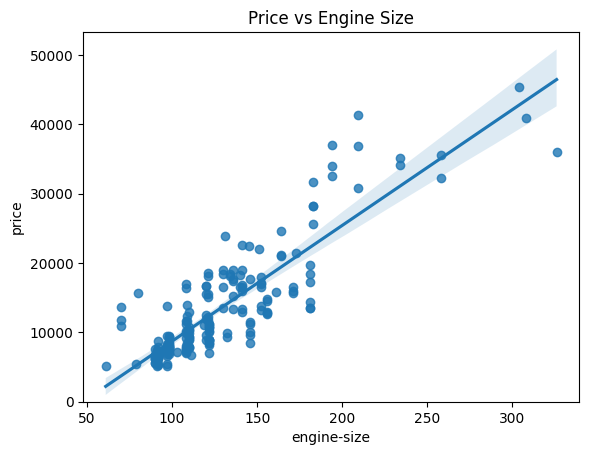

In [31]:
# positive linear relationship
sns.regplot(x='engine-size', y='price', data=df)
plt.title('Price vs Engine Size')
plt.ylim(0, )

In [33]:
# as the engine-size goes up, the price also goes up and this indicates a positive correlation. therefore, engine-size seems to be a really good predictor. 
# we can examine the correlation between 'engine-size' and 'price' using the corr() function.
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

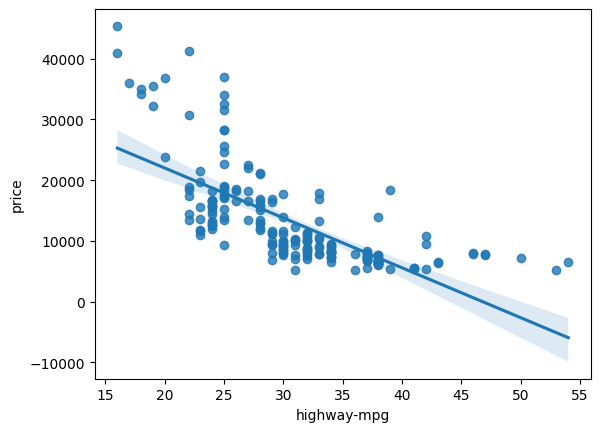

In [ ]:
# highway-mpg seems to bve also a good predictor, lets see 
sns.regplot(x='highway-mpg', y='price', data=df)\



In [36]:
# as the highway-mpg goes up, the price decreases. This shows an inverse/negative relationship between these two. 
# The data is not linear, but it is still possible to find a linear relationship between the two variables. the correlation between these two variables will be
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


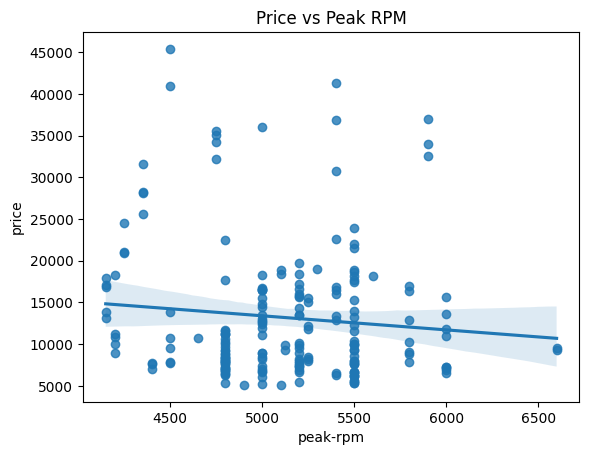

In [37]:
# Weak Linear relationship
# lets see if peak-rpm is a good predictor for price 
sns.regplot(x='peak-rpm', y='price', data=df)
plt.title('Price vs Peak RPM')
plt.show()

In [38]:
# the corr between the two variables
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


# Categorical Variables
# These are variables that describes the characteristic of a data unit and are selected from a small group of categories. 
# The categorical variables can have type 'object' or 'int64'. A good way to visualise these variables is by using the boxplots

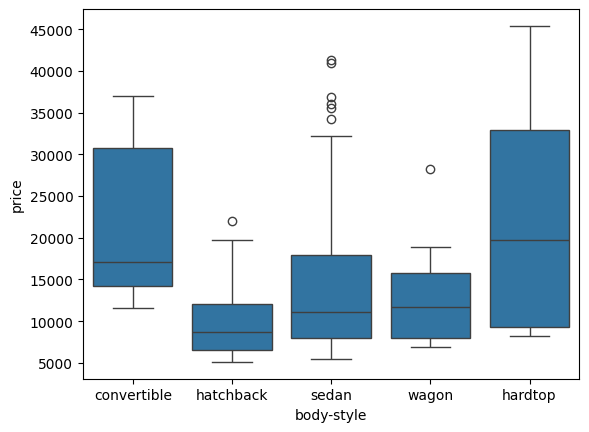

In [39]:
# Relationship between the 'body-style' and the 'price'
# The 'body-style' is a categorical variable and the 'price' is a continuous variable
sns.boxplot(x = 'body-style', y = 'price', data = df)
plt.show()

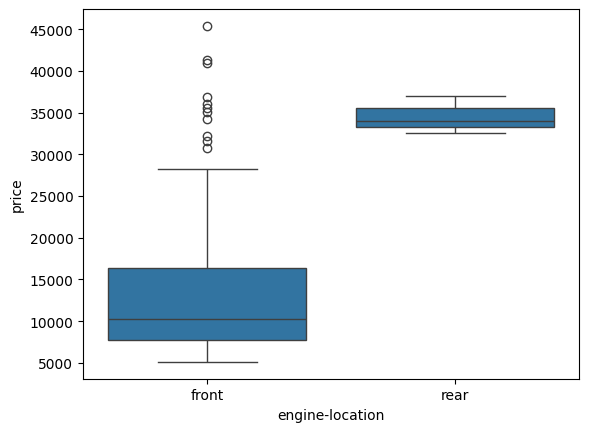

In [ ]:
# Engine-location
sns.boxplot(x = 'engine-location', y = 'price', data = df)
plt.show()

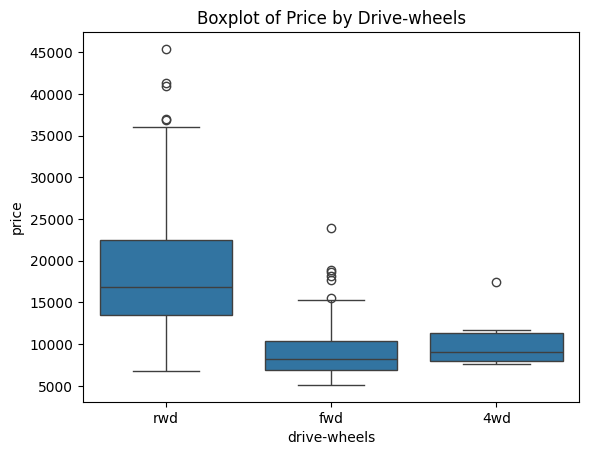

In [41]:
# Drive-wheels
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.title('Boxplot of Price by Drive-wheels')
plt.show()

# From the above analysis, we see that. 
# 1.the distribution of price between diff body-styles have a significant overlap. so body-style would not be a good predictor of the price
# 2. the distribution of price between these two engine-location categories, the front and the rear, are distinct enough to make the engine-location a good predictor of price.
# 3. the distribution of price between the diff drive-wheels differs. as such, drive-wheels could be a good predictor of price.

<!-- Fro -->

# DESCRIPTIVE STATISTICAL ANALYSIS
<p>The describe function automatically computes basic statistics for all the continuous variables. Any NaN values are always skipped in descriptive statistics.</p><br>
<li>
This will show:
<ul>count of that variable</ul>
<ul>the mean</ul>
<ul>the standard deviation (std)</ul>
<ul>the minimum value</ul>
<ul>the IQR (Interquartile Range: 25%, 50% and 75%)</ul>
<ul>the maximum value</ul>
</li>

df.describe()

In [43]:
df.describe()
# The default setting of describe() is to include only numeric columns. 
# If you want to include non-numeric columns, you can use the include parameter. we can apply the 'describe' method to include variables of type 'object' as follows:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [ ]:
# Value counts
# Value counts is a good way of understanding how many units of each characteristic/variable we have. 
df['drive-wheels'].value_counts()
# converting the series to a dataframe
df['drive-wheels'].value_counts().to_frame()


,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
# repeat  the above steps and save the results to a dataframe and rename
drive_wheels_count = df['drive-wheels'].value_counts().to_frame()
drive_wheels_count.rename(columns = {'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_count #  this code is not functioning as intended

# renaming the dataframe 
drive_wheels_count.index.name = 'drive-wheels'
drive_wheels_count


,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
# Repeat this for engine-location
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)



,count
engine-location,
front,198
rear,3


After examining the value counts of engine-location, we can see that it is not a good predictor variable for the price. This is because we only have 3 cars with rear engine and 198 in the front<br>
thus we are not able to draw any conclusions about the engine location.

<h1>Basics of Grouping</h1>
<p> The 'groupby' function groups databy diff categories. The data is grouped based on one or several variables and the analysis is perfomed on individual groups.
</p>

In [ ]:
df['drive-wheels'].unique()
# If we want to know, on average, which type of drive-wheels is most common, we can group the 'drive-wheels' and then find the average using the mean() function
df_group_one = df[['drive-wheels', 'body-style' 'price']]
# grouping results and calculating the average
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one 
# there is an error in this code since the body-style is an object and thus no output

<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.</p>


In [97]:
# grouping the results
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:</p>


In [98]:
# grouped_pivot = grouped_pivot.sort_values(by='count', ascending=False)
grouped_pivot = grouped_test1.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>


In [99]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [100]:
# average car price based on the body-style
df_gptest2 = df[['body-style', 'price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'], as_index=False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


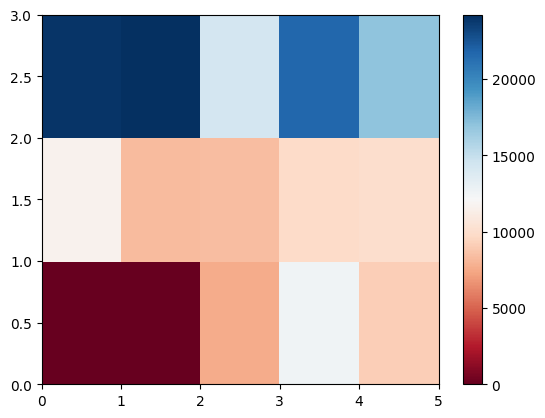

In [101]:
# visualizing the grouped data
plt.pcolor(grouped_pivot,  cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


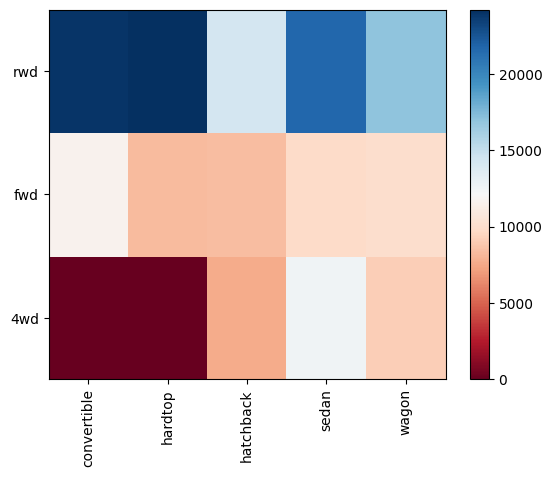

In [102]:
# changing the default labels
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')
# label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# move the ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# rotate the Label if too long
plt.xticks(rotation=90)
fig.colorbar(im)
plt.show()


<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.</p>

<p>The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the car price?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?</p>


<h2 id="correlation_causation">Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>

<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [103]:
# we can obtain this information from using the 'stats' module in the scipy library
from scipy import stats
# pearsons correlation coefficients  and P-vlaue for 'wheel-base' and 'price'
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print(" The pearsons Correlation Coefficient for wheel-base vs price is:", pearson_coef, "with a P-value of:", p_value)
# Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585). 


# Horse-power vs price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(" The pearsons Correlation Coefficient for horsepower vs price is:", pearson_coef, "with a P-value of:", p_value)

# Since the p-value is 
#  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

# length vs price 
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print(" The pearsons Correlation Coefficient for length vs price is:", pearson_coef, "with a P-value of:", p_value)
# Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691)

# width vs price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient for width vs price is", pearson_coef, " with a P-value of P =", p_value ) 

# Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).


# curb-weight vs price 
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient for curb-weigth vs price is", pearson_coef, " with a P-value of P = ", p_value) 

# Since the p-value is <0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

# engine-size vs price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient engine-size vs price is", pearson_coef, " with a P-value of P =", p_value) 

# Since the p-value is <0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

# bore vs price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient for bore vs price is", pearson_coef, " with a P-value of P =  ", p_value ) 
# Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).



# We can relate the process for each 'city-mpg' and 'highway-mpg':

# city-mpg
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient for city-mpg vs price is", pearson_coef, " with a P-value of P = ", p_value)  
# Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

# highway-mpg
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient for highway-mpg vs price is", pearson_coef, " with a P-value of P = ", p_value ) 
# Since the p-value is < 0.001, the correlation between highway-mpg and 
# price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.




 The pearsons Correlation Coefficient for wheel-base vs price is: 0.5846418222655081 with a P-value of: 8.076488270732847e-20
 The pearsons Correlation Coefficient for horsepower vs price is: 0.809574567003656 with a P-value of: 6.369057428259638e-48
 The pearsons Correlation Coefficient for length vs price is: 0.690628380448364 with a P-value of: 8.016477466158899e-30
The Pearson Correlation Coefficient for width vs price is 0.7512653440522674  with a P-value of P = 9.200335510481227e-38
The Pearson Correlation Coefficient for curb-weigth vs price is 0.8344145257702845  with a P-value of P =  2.189577238893924e-53
The Pearson Correlation Coefficient engine-size vs price is 0.8723351674455185  with a P-value of P = 9.26549162219869e-64
The Pearson Correlation Coefficient for bore vs price is 0.5431553832626603  with a P-value of P =   8.049189483935274e-17
The Pearson Correlation Coefficient for city-mpg vs price is -0.6865710067844679  with a P-value of P =  2.3211320655675065e-29
The

<h2 id="anova"> ANOVA</h2>
<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>Drive Wheels</h3>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'drive-wheels' impact  'price', we group the data.</p>



In [104]:
#  Drive wheels
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [105]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [108]:
# we can obtain the value of the method group using the method "get_group"

grouped_test2.get_group('4wd')['price']

C:\Users\Admin\AppData\Local\Temp\ipykernel_6516\2576151701.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_test2.get_group('4wd')['price']


4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [110]:
# we can use the function "f_oneway" in the module to get the F-score and P-value
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])
print("ANOVA results: F =", f_val, ", p =", p_val)

ANOVA results: F = 67.95406500780399 , p = 3.3945443577149576e-23


C:\Users\Admin\AppData\Local\Temp\ipykernel_6516\3677935927.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

Let's examine them separately.

In [ ]:
# ANOVA for fwd and rwd 
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])
print("ANOVA results  for fwd and rwd: F =", f_val, ", p =", p_val)

# ANOVA for 4wd and rwd 
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])
print("ANOVA results  for 4wd and rwd: F =", f_val, ", p =", p_val)

# ANOVA for 4wd and fwd 
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])
print("ANOVA results  for 4wd and fwd: F =", f_val, ", p =", p_val)


# We notice that ANOVA for the categories 4wd and fwd yields a high p-value > 0.1, so the calculated F-test score is not very statistically significant.
# This suggests we can't reject the assumption that the means of these two groups are the same, or, in other words, we can't conclude the difference in correlation to be significant.

ANOVA results  for fwd and rwd: F = 130.5533160959111 , p = 2.2355306355677366e-23
ANOVA results  for 4wd and rwd: F = 8.580681368924756 , p = 0.004411492211225367
ANOVA results  for 4wd and fwd: F = 0.665465750252303 , p = 0.4162011669784502


C:\Users\Admin\AppData\Local\Temp\ipykernel_6516\3143900931.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_6516\3143900931.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_6516\3143900931.py:10: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to sile